# **A quick introduction to timeseries forecasting using: ARIMA/ Deep Neural Networks, and Recrring Neural Networks (LSTM)**

In [ ]:
#Time series= where our signal or information is a function of time
#Time series is defined as a series of data points indexed in time order.
#In the past we look at a whole bunch of attributes, and try to predict; Is this acat, is this a dog?. or we looked at a while bunch of data and said, okay.. can we sell this or we can't.
#But, when it comes to time series, here it's just a function of time.
#Basically, if we model teme series, then x(time) doensn't mean anything; it's  just the time is increasing; THe data is not correlated typically with anything but itself; Meaning; if you look back one month
#ago, and a month ago, and a month ago, you'll see a pattern, but if you kind f correlate that with something else, you won't see a pattern; That's why time series is different from other type of data.
#Many traditional models require the time series to be stationary; If you have used traditional models like autoregression, arima... even Fourier transform based techniques, it requires the data to be stationary
#otherwise, how can you forecast if the mean and varaince are chaning. So stationary=Statistical properties such as mean, variance, and serial correlation are constant over time, otherwise, you cannot predict it
#**Stationary makes analysis more straightforward, but modern approaches makes it possible to work with data withhout pre-processing for stationarity.

#The newer approaches, wether it's LSTMs or approaches like SARIMA for example, are designed to work with some of those datasets that are non-stationary

In [ ]:
#Thanks to python libraries such as statsmodels and pmdarima: Stationarity,trends, and seasonality can be easily extracted from a timeseries.
#Trend= means how does the data trend as a long period of time.
#There are many traditional and modern approaches exist to analyze and forecast timeseries; We will be focusing on 3 approaches for python implementation: 
  #1)Auto-Regressive Integrated Moving Average (ARIMA): The biggest advantage of this model is that it can be applied in cases where the data shows evidence of non-stationarity.
  #2)Fully connected NN: Regural deep learning approaches can be used for time series with some data manipulation
  #3)Recurrent Neural Networks RNN(LSTM): Long-short-tearm memory(LSTM) is a type of RNN that works well on sequences/timeseries.


In [ ]:
#A quick summary of ARIMA
#ARIMA model for time series forecasting
##ARIMA is specified by three order parameters: (p,d,q)
#AR(p) Autoregression-- An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series
#=> The p component is the one that kind of controls the auto regression, or defines the auto regression part

#I(d) Integration -- Uses differencing of observations (Subtracting an observation from observation at the previous time step) in order to make the time series stationary.
#=> Which is basically it uses the differencing of observations.

#MA(q): Moving Average-- A moving average component depicts the error of the model as a combination of previos error terms. The order q represents the number of terms tobe included in the model.

##Various flavors of ARIMA Model:
  #ARIMA: Non-seasonal Auto-Regressive Integrated Moving Averages: Which means if you have any stationarity, seasonality.. you know you kind of take care of it during your pre-processing of data.
  #SARIMA: Seasonal ARIMA
  #SARIMAX: Seasonal ARIMA with exogenous variables
  
  #Pyramid Auto-ARIMA
  #The 'auto_arima' function from the 'pmdarima' library helps us to identify the most optimal parameters for an ARIMA model and returns a fitted ARIMA Model.

In [ ]:
#LSTM is designed to work with sequence type of data; which is time series of course, but also NLP: Anytime you deal with sequences, lstms are amazing.


# **Exploring data using python**

In [ ]:
"""
A quick overview of timeseries. 
Dataset from: https://www.kaggle.com/rakannimer/air-passengers
International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict 
the number of international airline passengers in units of 1,000. 
The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.
"""


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('dark_background')
#In addition to that, we are going to use a couple of modules; The one we should mention is called statsmodels
from statsmodels.tsa.stattools import adfuller

In [ ]:
# load the dataset
df = pd.read_csv('/content/sample_data/Data/AirPassengers.csv')
print(df.dtypes)
#The type of Month is object; Which is a text

Month          object
#Passengers     int64
dtype: object


In [ ]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
df['Month'] = pd.to_datetime(df['Month']) #We are going to change its type from object to datetime format
print(df.dtypes)

Month          datetime64[ns]
#Passengers             int64
dtype: object


In [ ]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
#typically it helps when we choose index as same as month:
df.set_index('Month', inplace=True) 

In [ ]:
df
#As we can see, our first column with index 0 1 2 3, which was absolutely useless, that's replaced by our month

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


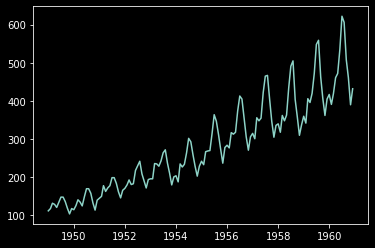

In [ ]:
plt.plot(df['#Passengers'])
#We observe that the trend is going up.. Also, there is something like a seasonality(it's going up and coming down...)


In [ ]:
#Is the data stationary? what does that mean? it means does the mean and the variance are not changing as a function of time in the timeseries.. So we can easily predict.
#As we can see.. the data is not stationary.. It's actually going up, and there's seasonality there.
#In statistics, there is something famous called "Dickey-Fuller test": You start with null hypothethis, and then if the p value, or the probability, is above 5%(0.005) then you say ok, the data is porbably not likely stationary
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")
#Since data is not stationary, we may need SARIMA and not just ARIMA


pvalue =  0.991880243437641  if above 0.05, data is not stationary


In [ ]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index] #strftime: we are going to strip the month part from the index
years = df['year'].unique()
#So this helps us have a quick look at are there any trends with respect to month, with respect to year: So we are exploring the data, we are not forecasting yet

In [ ]:
df

,#Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May
...,...,...,...
1960-08-01,606,1960,Aug
1960-09-01,508,1960,Sep
1960-10-01,461,1960,Oct


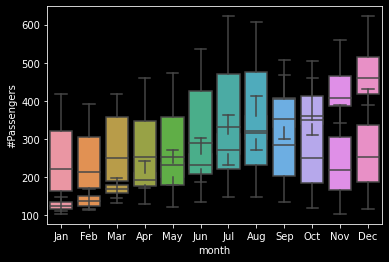

In [ ]:
#Plot yearly and monthly values as boxplot
sns.boxplot(x='year', y='#Passengers', data=df)
sns.boxplot(x='month', y='#Passengers', data=df)

##It plots the confidece intervals; So, it makes it a bit easy for us to quickly get a glance at the mean and the confidence interval; So that's one of the advantages of seaborn compared to regular pyplot


In [ ]:
#Well.. we have talked about trend and seasonality; There's an easy way to seperate these, we can do our own coding of we know how to do the mean or running average and that stuff.
#but we don't need to do any of that.. We can use statsmodels

In [ ]:
#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['#Passengers'],  
                            model ='additive')  #The model can be additive of multiplicative

#Additive time series:
#Value = Base Level + Trend + Seasonality + Error
#Multiplicative Time Series:
#Value = Base Level x Trend x Seasonality x Error


#The way to extract individual dataframes out of this is just do:
trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid

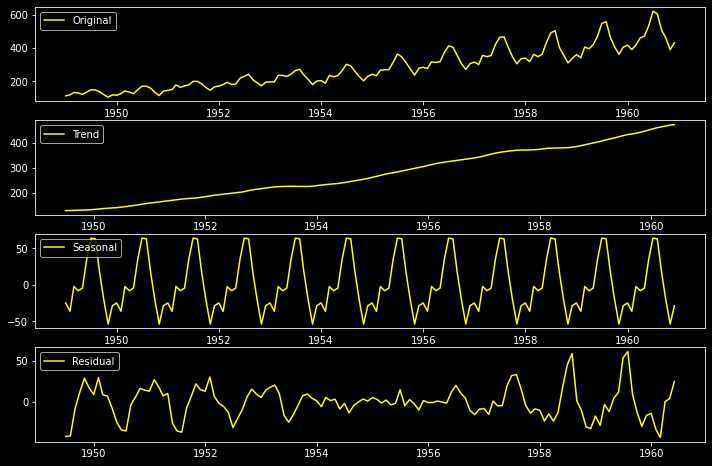

In [ ]:
#WHAT ARE THESE?  Well, just by looking at the numbers doesn't make any sesne to us; So let's go ahead and plot it

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['#Passengers'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow') #Residual: whatever is remaining
plt.legend(loc='upper left')
plt.show()
######SO now, if you really all you care about is just getting your seasonal infomation, you just need to run this decomposed, and then you already have your seasonal inforamtion, and you can take this seasonal
#and pick the right approach; ARIMA or whatever it's.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


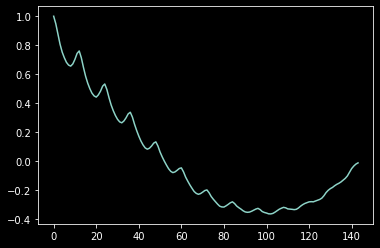

In [ ]:
#AUTOCORRELATION
#Autocorrelation is simply the correlation of a series with its own lags.
# Plot lag on x axis and correlation on y axis
#Any correlation above confidence lnes are statistically significant.



##Time series is all about autocorrelation: So as we have mentionned early, our values are not correlated with our x-axis (well, x-axis is there to plot it as function of time), but the values itsef are
#correlated with itself; Meaning, today's value is correlated with yesterday, and then the day before and so on: so the values because they're time series, it's supposed to be correlated with itself that's
#called autocorrelation.. So how am i oreelated with 5days ago, and then five days ago, and then 5 days ago, and if there's a weekly acitvity, how is that correlated with last week and week before, and so on.
#So there's 2 methods to do that:
#First of all, you can actually extract the acf from statsmodels, and there you can provide a lag; for example, we are providing a number of lags as 144. So it shows everything for 144 lags

from statsmodels.tsa.stattools import acf

acf_144 = acf(df["#Passengers"], nlags=144)
plt.plot(acf_144)
#On x-axis you have lags, and on y-axis you have auto-correlation
#Well, autocorrelation above zero means positive correlation, otherwise it's called negative correlation, and how much of that is correlated is the magnitude


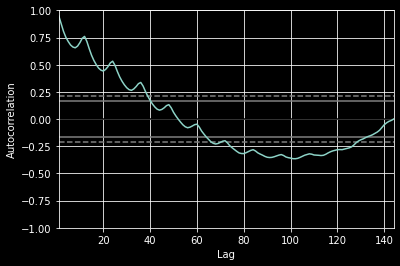

In [ ]:
#Second method: using the built-in autocorrelation plot from pandas library
#Obtain the same but with single line and more info... using 
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df["#Passengers"]) 
#Horizontal bands indicate 95% and 99% (dashed) confidence bands

#A strong positive correlation for lags below 40 (months)
#So any lag before 40 months in this dataset is all positevly correlated and it's above 99% confidence level.

In [ ]:
#A “lag” is a fixed amount of passing time; One set of observations in a time series is plotted (lagged) against a second, later set of data.
#The kth lag is the time period that happened “k” time points before time i. For example: Lag1(Y2) = Y1 and Lag4(Y9) = Y5.


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 9.9 MB 40.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


# **Using ARIMA in python**

In [ ]:
#https://youtu.be/TSfdvQ0ARwI
"""
Dataset from: https://www.kaggle.com/rakannimer/air-passengers
International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict 
the number of international airline passengers in units of 1,000. 
The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.
Stat library: https://www.statsmodels.org/stable/index.html
Need version 0.11 or later..
pip install statsmodels --upgrade
For pmdarima:
pip install pmdarima
"""
!pip install pmdarima
from pmdarima.arima import auto_arima

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('dark_background')
# load the dataset
df = pd.read_csv('/content/sample_data/Data/AirPassengers.csv')
print(df.dtypes)

df['Month'] = pd.to_datetime(df['Month'])
print(df.dtypes)

df.set_index('Month', inplace=True) 


Month          object
#Passengers     int64
dtype: object
Month          datetime64[ns]
#Passengers             int64
dtype: object


In [ ]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


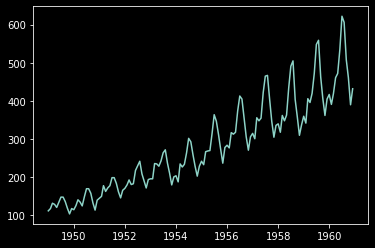

In [ ]:
plt.plot(df['#Passengers']) #Passengers/Month(index)

In [ ]:
#Is the data stationary? Well, it's clear that it's not.. but if we want to see that, there's 2 ways to do so:


#Method1
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)
#Not stationary...

(0.01, False)

In [ ]:
#Method2
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")
#Since data is not stationary, we may need SARIMA and not just ARIMA


pvalue =  0.991880243437641  if above 0.05, data is not stationary


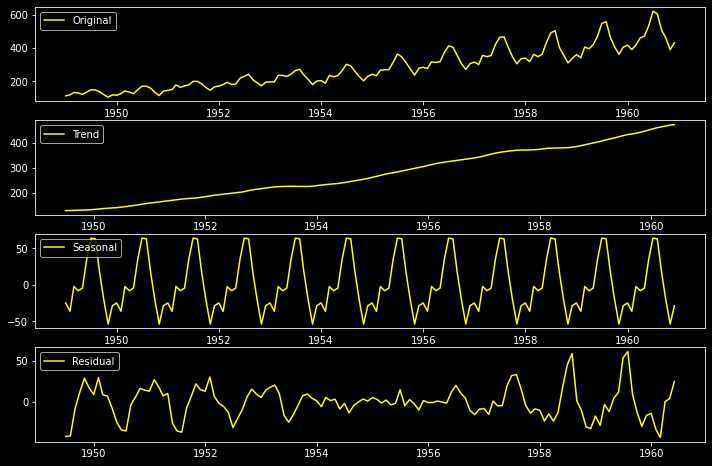

In [ ]:
#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['#Passengers'],  
                            model ='additive')

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df, label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

###You can only take the seasonal part, and then just apply some forecsating if you want.. but don't forget to add that to the trend, so you get the real values back.
#But, SARIMA takes care of bunch of that'

In [ ]:
#We can go through the exercise of making the data stationary and performing ARIMA
#Or let auto_arima provide the best model (e.g. SARIMA) and parameters. 
#Auto arima suggests best model and parameters based on 
#AIC metric (relative quality of statistical models)

In [ ]:
#from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(df['#Passengers'], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)           


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.27 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.65 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.87 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=1.99 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.31 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.54 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=5.91 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.37 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.62 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.78 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.51 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [ ]:
# To print the summary 
print(arima_model.summary() ) #Note down the Model and details.
# Model: SARIMAX(0, 1, 1)x(2, 1, [], 12)


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 29 Nov 2022   AIC                           1019.178
Time:                                     10:24:45   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

In [ ]:
#That's great!! So how we forecast; Well, to forecast, we have to fit a model. What do we fit to? You can fit a model to the entire data, and then do forecasting. 
#But how would you know if you're doing a good job or bad job in forecasting? So it's customary to take a part of the data and use it for training, and another part used 
#for testing.. and then do the forecasting.
#In general, we took 80/20. But that doesn't work here; This is time series; The value before and after has some meaning to it. So you cannot randomly do that.
#==>That's why we are actually taking 66%(2/3) of the data from the begining, and assign that to training; And the remaining is for testing

#Split data into train and test
size = int(len(df) * 0.66)
X_train, X_test = df[0:size], df[size:len(df)] #: X_train: the type is DF, and size=(95,1). x_test: the type is DF, and size=(49,1)

In [ ]:
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(X_train['#Passengers'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() #We defined the model, so know we have to fit it to the data. So it's ready for prediction
###########We are storing the model.fit in a parameter called result: So then we have to do result.predict
result.summary() 



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -300.268
Date:                            Tue, 29 Nov 2022   AIC                            610.536
Time:                                    10:53:53   BIC                            622.570
Sample:                                01-01-1949   HQIC                           615.368
                                     - 11-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3202      0.103     -3.120      0.002      -0.521      -0.119
ar.S.L12       0.6848      0.650      1.053      0.292      -0.589       1.959
ar.S.L24       0.3142      0.135      2.335      0.020       0.051       0.578
ma.S.L12      -0.9824      6.320     -0.155      0.876     -13.368      11.404
sigma2        78.5251    445.371      0.176      0.860    -794.386     951.436
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.95   Prob(JB):                         0.28
Heteroskedasticity (H):               1.69   Skew:                             0.42
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index)

In [ ]:
X_train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1956-07-01,413
1956-08-01,405
1956-09-01,355


In [ ]:
train_prediction

1949-01-01      0.000000
1949-02-01    111.998298
1949-03-01    117.999818
1949-04-01    131.999575
1949-05-01    129.000091
                 ...    
1956-07-01    419.541093
1956-08-01    398.688927
1956-09-01    365.414390
1956-10-01    320.671349
1956-11-01    274.821840
Freq: MS, Name: predicted_mean, Length: 95, dtype: float64

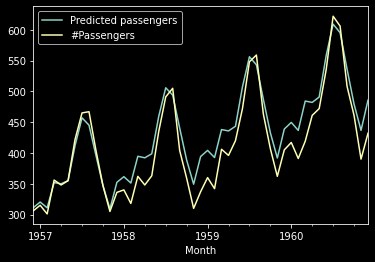

In [ ]:

#Prediction
start_index = len(X_train)
end_index = len(df)-1
prediction = result.predict(start_index, end_index).rename('Predicted passengers') 
#Rename the column

# plot predictions and actual values 
prediction.plot(legend = True) 
X_test['#Passengers'].plot(legend = True) 

In [ ]:
import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(X_train, train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(X_test, prediction))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 16.14 RMSE
Test Score: 29.49 RMSE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


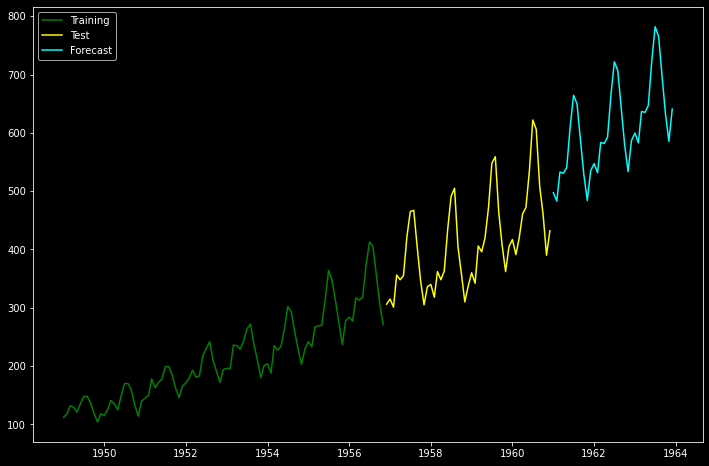

In [ ]:
#################Let's forecast now for further years; years that do not exist in the dataset.##################
#from sklearn.metrics import r2_score
#score = r2_score(X_test, prediction)
#print("R2 score is: ", score)

#Forecast.. You can re-train on the entire dataset before forecasting
#For now let us use the trained model
# Forecast for the next 3 years 
forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
plt.figure(figsize=(12,8))
plt.plot(X_train, label='Training', color='green')
plt.plot(X_test, label='Test', color='yellow')
plt.plot(forecast, label='Forecast', color='cyan')
plt.legend(loc='Left corner')
plt.show()

#ARIMA acts very good in time series forecasting.. and it's not weaker than neural networks or LSTM (Although LSTM and others can be applied to a bit more complex type of datasets
#wether it's stocks or other datasets).
#You need to need 3 types of forecasting(ARIMA/ NN(LSTM)/ and Fourrier transform based, and which means you're converting this from the time domain into a frequency domain ) 
##################

# **Timeseries forecasting using Feed forward neural networks in python**

In [ ]:
#How can we use timeseries for timeseries? well, using some tricks; Because instead of providing x and y values; think of it as providing of course x and y, but our x is 
#three or five numbers, previous to the y value; So if I have a data point from today, what if I provide data point from yesterday and day before and the day before, 
#and the day before as inputs, and today as output. And for the next data point, I'm going to provide day before; yesterday, yesterday and today as input and tomorrow's value
#as output, and run this in a moving up, and if  we reorder our data such a way, this can be very useful.


In [ ]:
"""
Dataset from: https://www.kaggle.com/rakannimer/air-passengers
International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict 
the number of international airline passengers in units of 1,000. 
The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.
"""

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential #because we are going to define our model in a sequential way; First, a layer comes in, and then another layer, and then another layer.
#And if you have very weird architecture for your DL, then it can make things complicated.
from keras.layers import Dense #Dense is a fully connected layer.
from sklearn.preprocessing import MinMaxScaler #Scikit-learn is another ML package that contains a lot of traditional ML tools including classifiers like random forest, 
#and SVM, and a  whole bunch of other calssifiers, but also under pre-processing, it has scaling tools like minmax scalar and metrics...etc.
from sklearn.metrics import mean_squared_error


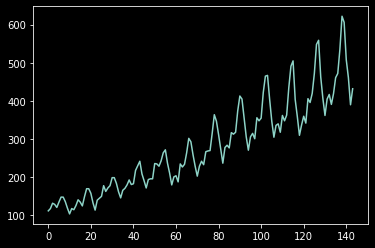

In [ ]:
# load the dataset
dataframe = read_csv('/content/sample_data/Data/AirPassengers.csv', usecols=[1])
plt.plot(dataframe)

In [ ]:
#Convert pandas dataframe to numpy array; because when dealing with DL, what we supply to it is a numpy array.
dataset = dataframe.values
dataset = dataset.astype('float32') #Convert values to float because  when we do some math with these numbers, especially using NN, we want these to be floating point numbers
#not integers, because you don't want to lose things in round of ereors


In [ ]:
# Normalization is optional but recommended for neural network as certain 
# activation functions are sensitive to magnitude of numbers. 
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
#Some activation functions are good with numbers that exist in our dataset, but others no; they need numbers between 0 and 1 or -1 and 1
#And then we fit that to the dataset.
dataset = scaler.fit_transform(dataset) 

In [ ]:
#We cannot use random way of splitting dataset into train and test as
#the sequence of events is important for time series.
#So let us take first 60% values for train and the remaining 1/3 for testing
# split into train and test sets
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# We cannot fit the model like we normally do for image processing where we have
#X and Y. We need to transform our data into something that looks like X and Y values.
# This way it can be trained on a sequence rather than indvidual datapoints(Like ARIMA)
# Let us convert into n number of columns for X where we feed sequence of numbers
#then the final column as Y where we provide the next number in the sequence as output.
# So let us convert an array of values into a dataset matrix

#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period.

#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1).

def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [ ]:
'''###########Alternatively, we can use TimeseriesGenerator from keras to automatically arrange your data into variou sequences for training(code on Sreeni's github)
from keras.preprocessing.sequence import TimeseriesGenerator
seq_size=length=10
batch_size=1
train_generator=TimeseriesGenerator(train,train, length=length,batch_size=batch_size)
...
model.fit_generator(generator=train_generator,verbose=2,epochs=25)
'''

In [ ]:
seq_size = 5 #The window size: Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [ ]:
#Compare trainX and dataset. You can see that X= values at t, t+1 and t+2
#whereas Y is the value that follows, t+3 (since our sequence size is 3)

print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))

Shape of training set: (89, 5)
Shape of test set: (43, 5)


In [ ]:
#Input dimensions are... (N x seq_size)
print('Build deep model...')
# create and fit dense model
model = Sequential()
model.add(Dense(64, input_dim=seq_size, activation='relu')) #12
model.add(Dense(32, activation='relu'))  #8
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
print(model.summary()) 


Build deep model...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                384       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#for layer in model.layers:
#    print(layer.input_shape)

##################################################
#Try another model....
#print('Build simple model...')
## create and fit dense model
#model = Sequential()
#model.add(Dense(8, input_dim=seq_size, activation='relu'))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
#print(model.summary()) 



#model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Epoch 1/100
3/3 - 1s - loss: 0.1125 - acc: 0.0112 - val_loss: 0.5936 - val_acc: 0.0000e+00 - 738ms/epoch - 246ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0832 - acc: 0.0112 - val_loss: 0.4549 - val_acc: 0.0000e+00 - 38ms/epoch - 13ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0583 - acc: 0.0112 - val_loss: 0.3385 - val_acc: 0.0000e+00 - 39ms/epoch - 13ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0392 - acc: 0.0112 - val_loss: 0.2407 - val_acc: 0.0000e+00 - 37ms/epoch - 12ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0242 - acc: 0.0112 - val_loss: 0.1618 - val_acc: 0.0000e+00 - 37ms/epoch - 12ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0143 - acc: 0.0112 - val_loss: 0.1001 - val_acc: 0.0000e+00 - 45ms/epoch - 15ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0085 - acc: 0.0112 - val_loss: 0.0575 - val_acc: 0.0000e+00 - 52ms/epoch - 17ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0066 - acc: 0.0112 - val_loss: 0.0341 - val_acc: 0.0233 - 77ms/epoch - 26ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0069 - acc: 0.0112 - val_loss: 0.0241 - val

In [ ]:
# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 12ms/step


In [ ]:
# Estimate model performance
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])


In [ ]:
print(trainY_inverse)

[[135.00000368 147.99999397 147.99999397 136.00000531 119.00000078
  103.99999952 117.99999916 115.00000199 125.99999674 140.99999801
  135.00000368 125.00000283 148.9999956  169.99999891 169.99999891
  157.99999481 133.00000042 114.00000036 139.99999638 145.00000452
  149.99999723 177.9999965  163.00000295 172.00000217 177.9999965
  198.99999982 198.99999982 184.00000627 162.00000133 146.00000615
  165.9999924  171.00000054 179.99999976 193.00000549 181.00000139
  183.00000464 217.99999988 230.00000398 241.99999264 209.00000066
  191.00000223 172.00000217 194.00000712 195.99999493 195.99999493
  235.99999831 234.99999668 229.00000235 242.99999427 263.99999759
  272.00001061 236.99999994 211.00000392 179.99999976 201.00000308
  203.99999252 187.99999735 234.99999668 226.9999991  233.99999506
  263.99999759 301.99999771 292.99999849 259.00000488 229.00000235
  203.00000633 229.00000235 241.99999264 232.99999343 266.99998703
  268.99999029 270.00000736 315.00000344 363.99999059 346.99999

In [ ]:
print(trainPredict)


In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 21.20 RMSE
Test Score: 47.36 RMSE


In [ ]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

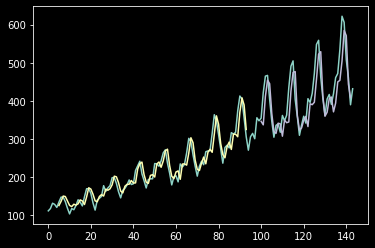

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# **An introduction to RNN  (Recurrent Neural Networks) and LSTM         Long-Short-Term-Memory)**

In [ ]:
#RNN remmebers the past.
#Why do we need RNNs? IF we see in the slide "Why do we need RNNs?"(WHat's for dinner), we can observe that there's no correlation between the two columns. However, there
#is correlation between the elements of the second column; This is what we call autocorrelation.
#In the tradition work, we model x to predict y, but here we model y to predict y.
#So, RNNs are designed to make use of sequential information.
###RNNs are "unrolled" programmatically during training and predicti on
####RNN is like multiple copies of the same netowrk where each copy passes information to the others
###The list like structure makes them appropriate for sequential data. (e.g. time series, natural language, etc.)
###There are many types of RNN: One to One(Image classification), One to many(Image captioning), Many to one(Sentiment analysis), and many to many(Lnaguage translation)

In [ ]:
#The probmem with RNN
#RNNs are good with short sequence such sa: The sky is _____________(Answer:blue)
#But: This is  the 10th day of wildfires in the San Fancisco bay area. There is smoke everywhere, it is snowing ash and the sky is ___.(Corect answer: Red).
#So how does the RNN know this?!! it doesn't remember this much of this. It looks at "and the sky is", and then it's trying to fill this with "blue"; In other words, 
#A lot of previous information is necessary to get the answer right, and RNNs seem to fail.
#Theoretically they should be able to do it, but apparently they fail.
#This is why we have LSTMs.. LSTM is a special kind of RNN; It's designed to overcome limitations of RNNs such sa: 
#-Gradient vanishing and exploding
#-Complex training
#-Difficulty to process very long sequences.
#==> Remembering information for long periods of time is intrinsic to LSTM
##RNNs vs LSTMs: In RNN we only have tanh, but in LSTM; we don't have just that, but it contains in addition 3 sigmoid.

#Contents of LSTM: The top part is the "Cell state".
#It has "Forget gate": It helps us in defining what information to forget, what information to remember.: HOW MUCH OF THE PAST TO FORGET.
#Next one is the "Input gate"; This obviously controls the amount of information that goes through: WHAT NEW INFORMATION WILL BE STORED IN THE CELL STATE
#And finally, the "Output gate": Also we are doing some math before we send it to the output
#Gates  let information through the cell state at the (x) and (+): So for example, the forget gate can be one, and then we multiply that by the information (the Ct-1), so nothing gets forgotten, and everything
#goes through

In [ ]:
##WHY SIGMOID?
#Sigmoid can output 0 to 1, it can be used to forget or remember the information.
##WHY TANH? Tanh goes from -1 to 1, and it's a great function to actually add weight to individual values, but it is there to overcome the vanishing gradient problem. Tanh's second derivative can sustain
#for a long range before going to zero.but if we look to simgmoid for example, the second derivative do not sustain and goes to zero.

#In the input gate:  it: sigmoid layer decides which values are updated. And tanh layer gives weights to the values to be added to the state
#And moving on to the output gate, again it has a sigmoid layer; which decides which part of cell state is selected for output, and tanh gives as usual the wieghts.

In [ ]:
###HOW DOES IT LOOK IN KERAS?
#inputs--LSTM 50 units--LSTM 50 units--LSTM 50 units--Dense output layer: Here we set how many units of LSTM./ return_sequences=True that means yes return that, so I can stack another lstm, another lstm...
import tensorflow as tf
from keras.models import Sequential
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))#I am droping 20% of the data(This is optional depending on how your data looks)

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squarred_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

In [ ]:
#There as few more variations of LSTM; for instance: Bidirectional LSTM(since the LSTM that we have talked about is unidirectional, and if the series has meaning in both directions, then this could be useful), 
#and convLSTM.

# **An introduction to time series forecasting - Using LSTM**

In [ ]:
"""
Dataset from: https://www.kaggle.com/rakannimer/air-passengers
International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict 
the number of international airline passengers in units of 1,000. 
The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.
"""

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D

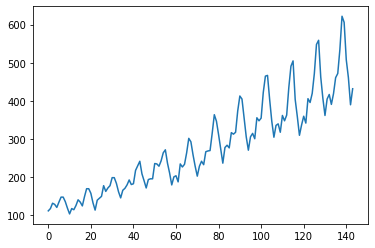

In [ ]:
# load the dataset
dataframe = read_csv('/content/sample_data/Data/AirPassengers.csv', usecols=[1])
plt.plot(dataframe)

In [ ]:
#Convert pandas dataframe to numpy array
dataset = dataframe.values #it's converting my pandas dataframe to numpy array
dataset = dataset.astype('float32') #COnvert values to float because i am going to do math, and i don't want to lose anything due to rounding errors.

#################LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized#######################
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

In [ ]:
#We cannot use random way of splitting dataset into train and test as
#the sequence of events is important for time series.
#So let us take first 60% values for train and the remaining 1/3 for testing
# split into train and test sets
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
##############REANRANGE THE DATA INTO X AND Y FORMAT
# We cannot fit the model like we normally do for image processing where we have
#X and Y. We need to transform our data into something that looks like X and Y values.
# This way it can be trained on a sequence rather than indvidual datapoints. 
# Let us convert into n number of columns for X where we feed sequence of numbers
#then the final column as Y where we provide the next number in the sequence as output.
# So let us convert an array of values into a dataset matrix

#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period.

#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1).

def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)
    

In [ ]:
###If your data is not corrected for trend, looking farther barck in time may result in less accurate forecast (FUN exercise: Compare Feed forward,simpleRNN and LSTM results
#for longer look back times): consider autocorrelation vs lag(farther back in time)


In [ ]:
seq_size = 5  # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.

trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)



print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))


Shape of training set: (89, 5)
Shape of test set: (43, 5)


In [ ]:
######################################################
#Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#
print('Single LSTM with hidden Dense...')
model = Sequential()
model.add(LSTM(64, input_shape=(None, seq_size)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
##                        verbose=1, mode='auto', restore_best_weights=True)
model.summary()
print('Train...')
#########################################
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Single LSTM with hidden Dense...
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/100
3/3 - 3s - loss: 0.0841 - val_loss: 0.4340 - 3s/epoch - 844ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0588 - val_loss: 0.3323 - 37ms/epoch - 12ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0394 - val_loss: 0.2464 - 37ms/epoch - 12ms/step
Epoch 4/100
3/3 - 0s - loss: 0.02

In [ ]:
# make predictions
trainPredict= model.predict(trainX)
testPredict = model.predict(testX)
#to invert the transformation.
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

2/2 [==============================] - 0s 6ms/step


Train Score: 23.93 RMSE
Test Score: 51.13 RMSE


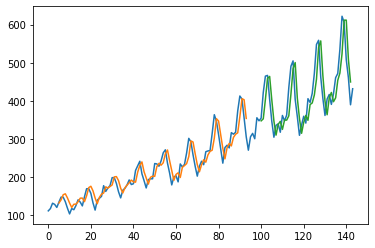

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:

#Stacked LSTM with 1 hidden dense layer
# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#
#model = Sequential()
#model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(None, seq_size))) ###WE ADD  RETURN_SEQUENCES=TRUE WHEN WE HAVE MORE THAN AN LSTM LAYER, otherwise,
#it doesn't return the sequence, so there's no input to your next lstm
#model.add(LSTM(50, activation='relu'))
#model.add(Dense(32))
#model.add(Dense(1))
#model.compile(optimizer='adam', loss='mean_squared_error')
#
#model.summary()
#print('Train...')
###############################################

#Bidirectional LSTM
# reshape input to be [samples, time steps, features]
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# #For some sequence forecasting problems we may need LSTM to learn
# # sequence in both forward and backward directions
# from keras.layers import Bidirectional
# model = Sequential()
# model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(None, seq_size)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.summary()
# print('Train...')

########################################################
#ConvLSTM
#The layer expects input as a sequence of two-dimensional images, 
#therefore the shape of input data must be: [samples, timesteps, rows, columns, features]

trainX = trainX.reshape((trainX.shape[0], 1, 1, 1, seq_size))
testX = testX.reshape((testX.shape[0], 1, 1, 1, seq_size))

model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, seq_size)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
#print('Train...')



###############################################
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)


# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions back to prescaled values
#This is to compare with original input values
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# **Recurrent Neural Networks (RNNs) and LSTM, Clearly Explained!!!**

In [ ]:
#Regardless of how many times we unroll a recurrent neural network, the weights and biases are shared across every input.
#And no matter how many times we unroll a recurrent neural network, we never increase the number of weights and biases that we have to train. 
#One big problem in rnn, which is the more we unroll a recurrent neural network, the harder it is to train: This problem is called the vanishing/exploding gradient problem; How does that happened?
#In our example, the vanishing/exploding gradient problem has to do with the weight along the squiggle that we copy each time we unroll the network


#THe main idea behind how lstm works is that instead of using the same feedback loop connection for events that hapened long ago, and events that just happened yesterday to
#make a prediction about tomorrow, lstm uses 2 seperate paths to make predictions about tomorrow. One path is for long-term memories, and one is for short-term memories
#The bad news is that compared to a basic, vanilla RNN, which unrols form a relatively simple unit.. lstm is based on a much more complicated unit.
#LSTM uses sigmoid activation functions(between 0 and 1) and tanh activation functions (between -1 and 1)
#The cell state represents the long-term memory: Although the long-term memry can be modified by the multipilication (x) and the sum, we can notice that there are no weights
#and biases that can modify it directly. This lack of weights allows the long term memories to flow through a series of unrolled units without causing the gradient to explode 
#or vanish.
#The hidden state represents the short-term memories, and they're directly connected to weights that can modify them 
#Let's move now to the input gates; it's constituted from 2 blocks; in a nutshell, the block on the right combines the short-term memory and the input to create a potential
#long-term memory.. and the block on the left determines what percentage of that potential memory to add to the long-term memory.
#Even though this part of the LSTM unit determines how we should update the long-term memory, it's usually called the Input gate.

#And now that we have a new long-term memory, we're ready to talk about the final stage in the LSTM. The final stage updates the short-term memory. We start with the new
#long-term memory, and use it as input to the tanh.
#And because the new short-term memory is the Output from this entire LSTM unit, this stage is called the Output Gate.

In [ ]:
########The reason the LSTM reuses the exact same weights and biases is so it can handle data sequences of different lengths.
#Well.. I didn't understand this very well... 